<a href="https://colab.research.google.com/github/mahshadlotfinia/MachineLeaningForEng1/blob/main/Copy_of_ML4Eng_I_Exercise_Pipeline_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning Based on the Use Case Energy Prediction


## Table of contents:


* ###  1. Introduction
* ###  2. Overview and data loading
* ###  3. Visualization
* ###  4. Missing values and outliers
* ###  5. Splitting of the dataset
* ###  6. Linear Regression
* ###  7. Random Forest Regressor
* ###  8. Support Vector Regression
* ###  9. Comparison of the results
* ### 10. Deployment of the model

## 1. Introduction 

Within this exercise we want to show the implementation of a supervised learning procedure with the necessary pre- and post-processing steps using the use case of the energy prediction of a machining process.

Our goal is to perform a regression analysis using the data that we have to train different regression models to predict the target variable. In our use case we want to predict the energy requirement to perform a milling process.

#### 1.1 Motivation for energy prediction

1. Creation of transparency and implementation of energy planning
2. Adaptation and optimization of the process parameters according to the energy requirement
3. Possibility of load management
4. Detection of deviations due to the comparison of the prediction and the actual energy profile


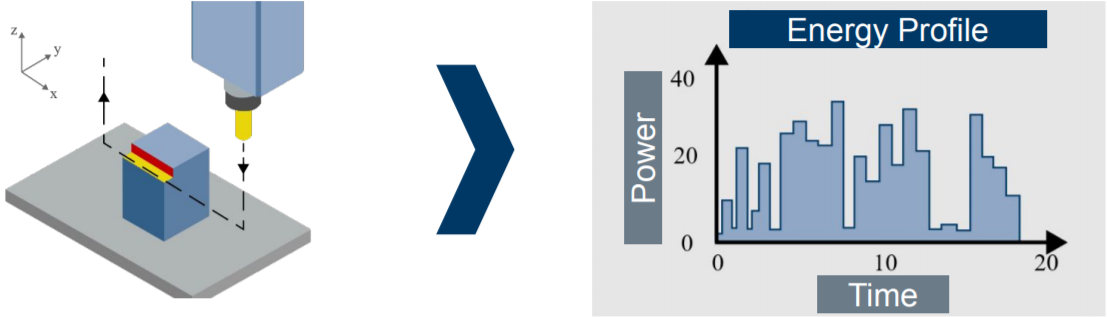

<div>
<img src="attachment:ML6.png" width="800"/>
</div>

Based on the planned process parameters, the energy required for the milling process is to be forecasted. As a basis for the development of a regression model, tests were carried out on a milling machine to gain sufficient data for the training.

#### 1.2 Structure of a milling machine

Using the Cartesian coordinate system, a machine can be controlled along each axis. Based on each axis, you typically get the following movements from the perspective of an operator facing the machine:
- X axis allows movement “left” and “right”
- Y axis allows movement “forward” and “backward”
- Z axis allows movement “up” and “down”

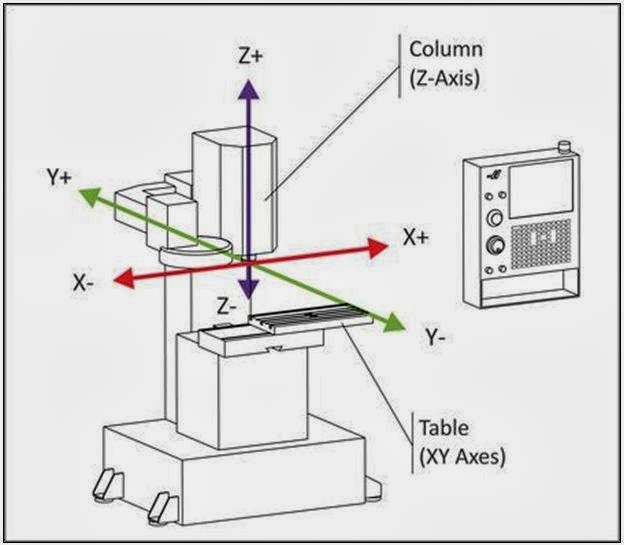


<div>
<img src="attachment:ML5.JPG" width="400"/>
</div>
Based on these movements, the right tool and other process parameters (feed, etc.) we can perform the required milling process.

#### 1.3 Deliverables
To complete this exercise successfully, you need to provide certain results. Throughout the notebook you will find **questions** you need to answer, and coding **tasks** where you need to modify existing code or fill in blanks. The answers to the questions need to be added in the prepared *Your answer* markdown fields. Coding tasks can be solved by modifying or inserting code in the cells below the task. If necessary, you can add extra cells to the notebook, as long as the order of the existing cells remains unchanged. Once you are finished with the lab, you can submit it through the procedure described in the forum. Once the labs are submitted, you will receive feedback regarding the questions. Thus, the **Feedback** boxes need to be left empty.

Example:

>**Question:** What do I do if I am stuck solving this lab?

>**Your answer:** <span style="color:green">Have a look at the forum, maybe some of your peers already experienced similiar issues. Otherwise start a new discussion to get help!</span>

>**Feedback:** <span style="color:orange">This is a great approach! Besides asking in the forum I'd also suggest asking your tutor.</span>

>**Solution:** <span style="color:black">The correct solution for the question. The solution well be provided after the review process.</span>

#### 1.4 Resources
If you are having issues while completing this lab, feel free to post your questions in the forum. Your peers as well as our teaching advisors will screen the forum regularly and answer open questions. This way, the information is available for fellow students encountering the same issues.

Note: Here we also want to promote the work with online resources and thus the independent solution of problems. For some tasks you have to "google" for the appropriate method yourself. For other tasks the already given code must be adapted or just copied.

## 2. Data loading and first overview

* The given data is stored in a text file containing the following columns,

  * Axis
  * Feed [mm/min]
  * Path [mm]
  * Energy requirement - Target variable [kJ]

#### 2.1 Loading the data

First we have to load the necessary libraries. 

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# setting white grid background
sns.set_style('whitegrid')
#%matplotlib notebook
%matplotlib inline

The next step is to access the prepared data set.

There are different options to import a data set into Google Colab. You can either import/upload from Google Drive or from your own HDD. In this Notebook the Google Drive folder is used.

For this purpose it is necessary to connect your Google Drive to this Notebook. Execute the following cell and folllow the instructions.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Following we can load the data.

In [5]:
# specification of the path to the input data (this path may vary for you depending on where you have your data file)
df = pd.read_csv(r'/content/drive/MyDrive/ML4Eng_I_dataset_energy_measurement.txt')
# if the link doesn't work, you'll need to adjust it depending on where you have stored the dataset in your Google Drive.

#### 2.1 Overview of the data

After that we need an overview of the dataset.

In [6]:
# statistical analysis of the dataset
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038631
75%,3.000000,2500.000000,40.000000,0.063982
max,15.000000,3000.000000,150.000000,0.900000


><font color='black'>**Question:** Discuss the results of the pandas `describe()` function.</font> 

The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

>**Your Answer:** <span style="color:green">TBD</span>  The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


>**Feedback:** <span style="color:orange">... </span>

><font color='black'>**Task:** Search and implement a (simple) method in order to show the first rows of the dataset. Try to use Google/ the documentation to find an appropriate one.</font> 

>**Feedback:** <span style="color:orange">... </span>

In [8]:
# implementation of the method

#############################
row_1 = df.iloc[0]
print (row_1)
#############################
        
###
# Solution
###



###
# END Solution
###

Axis                   -1.0
Feed                   20.0
Path                  120.0
Energy_Requirement      0.6
Name: 0, dtype: float64


## 3. Visualization 

Following all attributes of the data set are plotted.

><font color='black'>**Question:** Why is visualization of the input data important?</font>
<br>

>**Your Answer:** <span style="color:green">TBD</span>  The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.


>**Feedback:** <span style="color:orange">...</span>

Text(0, 0.5, 'Total quantity')

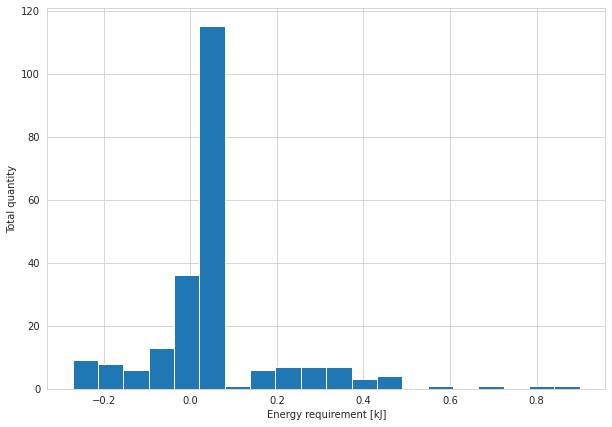

In [9]:
# plotting the target variable "Energy requirement"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Energy_Requirement,bins=20, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
plt.xlabel('Energy requirement [kJ]')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

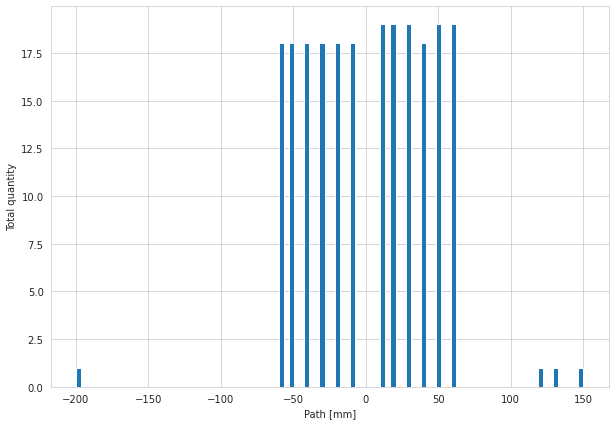

In [10]:
# plotting the attribute "Path"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Path,bins = 100, range = (df.Path.min(), df.Path.max()))
plt.xlabel('Path [mm]')
plt.ylabel('Total quantity')


><font color='black'> **Task:** Make same changes to the plot below. For example, you can adjust the number of bins, the name of the axis or the color of the plot. </font>
<br>

Text(0, 0.5, 'Total quantity (Axis)')

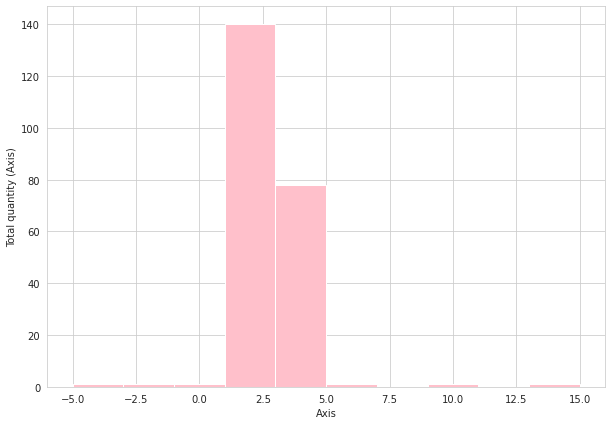

In [11]:
# plotting the attribute "Axis"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Axis,color='pink',bins =10, range = (df.Axis.min(), df.Axis.max()))
plt.xlabel('Axis')
plt.ylabel('Total quantity (Axis)')

>**Feedback:** <span style="color:orange">... </span>

Text(0, 0.5, 'Total quantity')

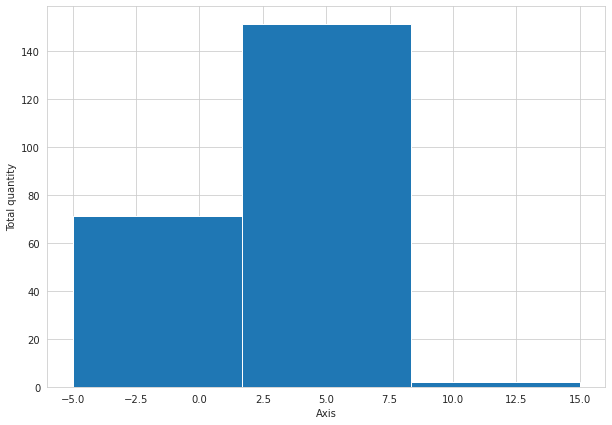

In [12]:
# plotting the attribute "Axis"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Axis,bins =3, range = (df.Axis.min(), df.Axis.max()))
plt.xlabel('Axis')
plt.ylabel('Total quantity')

><font color='black'>**Task:**
Visualize the last attribute "Feed" according to the privious ones. You can copy the most of the code, nethertheless you have to do some adjustments.
</font> 
<br>

Text(0, 0.5, 'Total quantity')

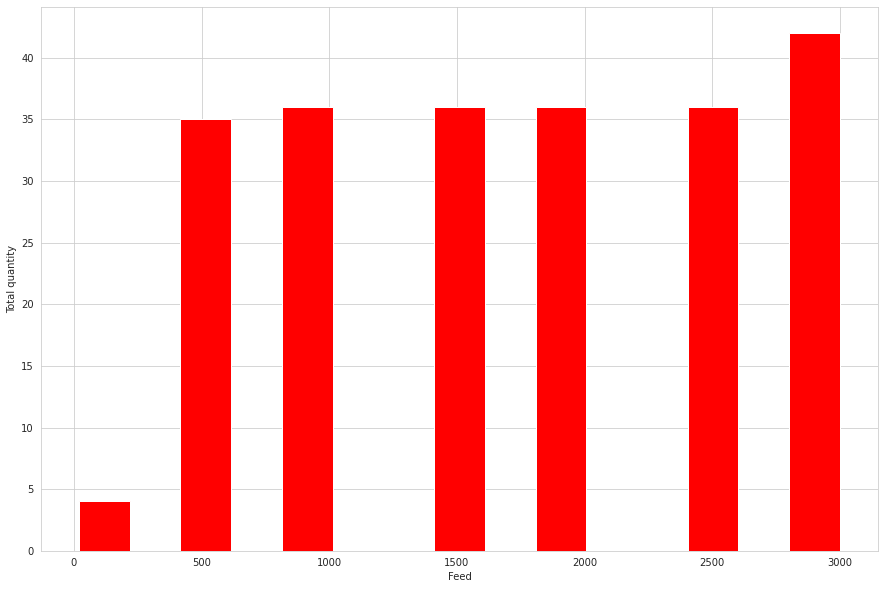

In [13]:
# plotting the attribute "Feed"
%matplotlib inline
plt.figure(figsize=(15,10))
plt.hist(df.Feed,color='red',bins =15, range = (df.Feed.min(), df.Feed.max()))
plt.xlabel('Feed')
plt.ylabel('Total quantity')

>**Feedback:** <span style="color:orange">... </span>

## 4. Missing values and outliers

1. Missing values can be NaN (null values) or breaks in the dataset that do not seem reasonable.
2. Outliers are values in our dataset that stand out from rest of the values in our dataset, an outlier may lie in an abnormal distance from other values in a distribution.

Missing values and outliers have to be detected and dealt with in order to prepare the data set for the following steps.

#### 4.1 Handling missing value

In [15]:
# Before we deal with missing values we visualize the first 10 instances of the data set.
# Missing values can be recognized here as NaN.
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057809


><font color='black'>**Task:** Use the the `dropna()` function to remove all rows with missing values. Use the documantation if you need further information about this method.
</font> 
<br>

>**Feedback:** <span style="color:orange">... </span>

In [16]:
# We drop all rows with missing values using the 'dropna function'

#############################
df.dropna()
#############################
        
###
# Solution
###



###
# END Solution
###

# After the removal of missing values we visualize the first 10 instances of the data set again.
#df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
...,...,...,...,...
221,2.0,3000.0,-20.0,0.024095
222,2.0,3000.0,-30.0,0.035993
223,2.0,3000.0,-40.0,0.047335
224,2.0,3000.0,-50.0,0.059736


We can see that the rows 5, 6, 7 and 8 have been dropped as they contained some missing values (NaN). 

#### 4.2 Handling outliers

Before we can deal with outliers, we have to identify them.
There are different methods to detect outliers. 

Since we have performed the tests for the independent variables (feed, axis and path) we know the range of these values. 
1. Axis: 1 to 3
2. distance: -60 to 60 [mm]
3. Feed rate: 500 to 3000 [mm/min]

All values outside these ranges are therefore outliers. The relevant instances should therefore be deleted.

><font color='black'>**Question:** Why is it important to remove outliers from our dataset?</font>
<br>

>**Your Answer:** <span style="color:green">TBD </span> Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.


>**Feedback:** <span style="color:orange">...</span>

In [17]:
# Before removing the ouliers we analize our data set with the desrcibe() method.
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038631
75%,3.000000,2500.000000,40.000000,0.063982
max,15.000000,3000.000000,150.000000,0.900000


><font color='black'>**Task:** Complete the following code line to remove all outliers for the attribute "Feed". 
</font> 
<br>

>**Feedback:** <span style="color:orange">... </span>

In [18]:
# Values of features outside the range of the known to us are treated as 'Outliers' and removed
# We only include those values of the feature that lie in the particular ranges of the feature
df = df.loc[(df.Axis >= 1) & (df.Axis <= 3) & 
            (df.Path >= -60) & (df.Path <= 60) & 

            #############################
            (df.Feed >= 500) & (df.Feed <= 3000)
            #############################
        
            ###
            # Solution
            ###

            
                       
            ###
            # END Solution
            ###         
           ]

In [19]:
# After removing the ouliers we analyze the data set again.
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


><font color='black'>**Question:** Please describe the changes within the data set.</font>
<br>

>**Your Answer:** <span style="color:green">TBD </span>  The cout of the data in decreased because some data are deleted. Min and max of the data is in the range of the other data not a number which out of the range of data. A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. In this dataset std which closely related to the data distributaion is changed because data which are out of range are deleted.



>**Feedback:** <span style="color:orange">... </span>

## 5. Splitting of the data set

Before we continue with the training, we have to split our data set.

1. Training dataset: the training dataset is used to determine the models parameters based on the data it has seen. Here, the labels are provided to the model so that it can learn about potential patterns in the data and thus adjust its parameters in such a way that it can predict data points.

2. Test dataset: This dataset is used to test the performance of the model. It can be used to see if the model is able to perform well on data which it has never seen before.

3. Target variable: Further we have to separate the target variable from the other attributes.

Splitting of the data can be done using Sklearn libraries.
  
More information on this can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### 5.1 Seperation features and target variable

In [20]:
# We separate the features (axis, feed, distance) and store it in 'X_multi' then we store our target varible (energy) in 'Y_target' to train our model.
X_multi = df.drop('Energy_Requirement', 1)

# energy requirement is our target variable
Y_target = df.Energy_Requirement

#### 5.2 Splitting the data into training and test sets

In [21]:
# The given dataset is divided into training and test datasets.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state=42)

In [22]:
# Checking the shapes of the datasets so that we dont wrongly fit the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(163, 3) (163,) (55, 3) (55,)


><font color='black'>**Question:** How is the default setting of the `train_test_split()` method regarding the distribution of the training and test dataset? Use the documentation for this method! And what are advantages/disadvantages of different distributions (big training dataset, small test dataset or same size of the data sets?</font>
<br>

>**Your Answer:** <span style="color:green">TBD </span>  The default split size in sklearn. model_selection. train_test_split are 75% training and 25% testing data split. There is no optimal split percentage.You must choose a split percentage that meets your project’s objectives with considerations that include:
1)Computational cost in training the model.
2)Computational cost in evaluating the model.
3)Training set representativeness.
4)Test set representativeness.

>**Feedback:** <span style="color:orange">... </span>

## 6. Linear Regression

Now we can start to use machine learning algorithms to predict the required energy. For that we carry out the follwowing steps: 

1. We import a Linear Regression algorithm from the Sklearn library.
2. The `fit()` function of the Linear Regression model is used to train our model with the training dataset. 
3. The `predict()` function is used to make predictions on a given dataset with the trained model.
4. Calculation of the losses to assess the performance.
5. Visualisation ot the losses.

These steps are similar for the implemenation of different regression algorithms.

#### 6.1 Import the library

In [23]:
from sklearn.linear_model import LinearRegression

#### 6.2 Training of the model

In [24]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

#### 6.3 Prediction

In [26]:
pred_train = lreg.predict(X_train) # prediction of the training data
pred_test = lreg.predict(X_test) # prediction of unseen data

#### 6.4 Calculate the different losses (Least Square Error, Mean Square Error)

><font color='black'>**Task:** Print the calculated losses for the test data with the `print()` method and write a short explanatory text.
</font> 
<br>

>**Feedback:** <span style="color:orange">... </span>

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# We calulate the error for the training and test datasets

# Training data
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_train)
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_train)

print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)


# Test data / unseen data
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_test)
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_test)


#############################
print("The Mean Square Error on the test data is:", MSE_linear_Test_Data)
print("The Mean Absolute Error on the test data is:", MAE_linear_Test_Data)
#############################
        
###
# Solution
###



###
# END Solution
###

The Mean Square Error on the training data is: 0.011678924858811793
The Mean Absolute Error on the training data is: 0.09121547964727235
The Mean Square Error on the test data is: 0.013044389500115314
The Mean Absolute Error on the test data is: 0.09051149946610133


><font color='black'>**Question:** Discuss the used error metrics and the results!
<br></font>

>**Your Answer:** <span style="color:green">TBD </span> MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
MAE is more robust to data with outliers.
The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable. For comparing the accuracy among different linear regression models, RMSE is a better choice

>**Feedback:** <span style="color:orange">... </span>

#### 6.5 Residual plots for Linear Regression

1. A residual value is a measure of how much a regression line vertically misses a data point.
2. In a residual plot the residual values are on the vertical axis and the horizontal axis displays the independent variable.
3. Ideally, residual values should be equally and randomly distributed around the horizontal axis.

Text(0, 0.5, 'Residual Value')

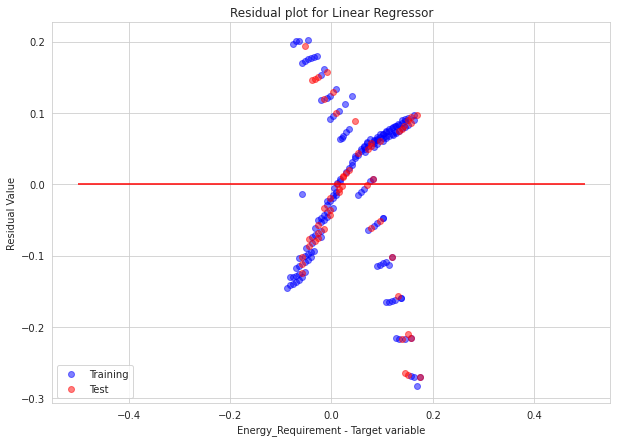

In [28]:
# We want the data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0,color='red', xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Linear Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")

## 7. Random Forest Regressor

This is another type of regression algorithm that uses averaging to improve predictive accuracy (summed up over the number of trees) and controls overfitting.

More on the parameters and information of this regressor can be found here - 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### 7.1 Import the library

In [29]:
# Import Random Forest Regressor from Sklearn
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

Meaning of some of the hyperparameters used above,

1. `n_estimators`: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees can increase the performance but make your code slower.

2. `random_state`: This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data.

#### 7.2 Training of the model

In [30]:
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

#### 7.3 Prediction

In [31]:
# Use the forest's predict method on the test data
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

#### 7.4 Calculate the different losses (Mean Absolute Error, Mean Square Error)

><font color='black'>**Task:** Complete the following code lines in order to calcute the results according to the Linear Regression! </font>
<br>

>**Feedback:** <span style="color:orange">... </span>

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# We calulate the errors for the training and test datasets.
# We save the errors according to the Linear Regression ("MSE_rf_Test_Data", "MAE_rf_Test_Data").


# Training data
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train)
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train)

print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)



# Test data / unseen data

#############################
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test)
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test)

#############################
        
###
# Solution
###



###
# END Solution
###


print("\n""Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)


Mean Square Error on the training data is: 6.316144649036996e-05
Mean Absolute Error on the training data is: 0.0026688087607363385

Mean Square Error on the test data is: 0.00017261970814991598
Mean Absolute Error on the test data is: 0.005879109009090978



#### 7.5 Residual plots for Random Forest Regressor

><font color='black'>**Task:** Add a title and the axis labels to the diagram.</font>
<br>


>**Feedback:** <span style="color:orange">... </span>

Text(0, 0.5, 'Residual Value')

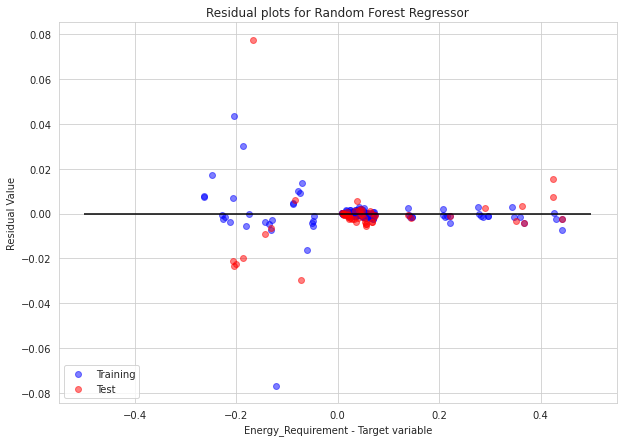

In [33]:
# We want the data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')

#############################
plt.title('Residual plots for Random Forest Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")
#############################
        
###
# Solution
###



###
# END Solution
###

Here we see that the model performs well on both, the training dataset as well as the test dataset, as the blue and red points are fairly close to the horizontal line and they are equally distributed.



## 8. Support Vector Regression (SVR)

1. The SVR tries to best approximate a line beween the features in order to predict the target variable.
2. This type of regressor can be used for linear and non-linear regression problems i.e. the best fitting function can be non-linear as well. The kernel functions transform the data into a higher dimensional feature space to make it possible to perform the linear separation.

More information on the parameters and kernels used in the SVR can be found here - 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

><font color='black'>**Task:** Implement all the steps used for the Linear Regression model (6.1 to 6.5) to the given Support Vector Regressor. Use the "rbf" kernel. Hint: You just have to copy and partly adapt the existing code!</font>
<br>

#### 8.1 Import the library

>**Feedback:** <span style="color:orange">... </span>

In [34]:
# Import SVR from Sklearn

#############################
from sklearn.svm import SVR
#############################
        
###
# Solution
###



###
# END Solution
###

#### 8.2 Training of the model

>**Feedback:** <span style="color:orange">... </span>

In [35]:
# initialize the model and train it

#############################
sv = SVR()

sv.fit(X_train, Y_train)
#############################
        
###
# Solution
###



###
# END Solution
###

SVR()

#### 8.3 Prediction

>**Feedback:** <span style="color:orange">... </span>

In [36]:
# predict the values for the training and test dataset

#############################
sv_pred_train = sv.predict(X_train) # prediction of the training data
sv_pred_test = sv.predict(X_test) # prediction of unseen data
#############################
        
###
# Solution
###



###
# END Solution
###

#### 8.4 Calculate the different losses (Mean Absolute Error, Mean Square Error)

>**Feedback:** <span style="color:orange">... </span>

In [37]:
# load the libraries and calculate the losses.
# save the errors according to the Linear Regression ("MSE_svr_Test_Data", "MAE_svr_Test_Data", etc.).



#############################
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Training data
MSE_svr_Train_Data = mean_squared_error(Y_train, sv_pred_train)
MAE_svr_Train_Data = mean_absolute_error(Y_train, sv_pred_train)

print("The Mean Square Error on the training data is:", MSE_svr_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_svr_Train_Data)


# Test data / unseen data
MSE_svr_Test_Data = mean_squared_error(Y_test, sv_pred_test)
MAE_svr_Test_Data = mean_absolute_error(Y_test, sv_pred_test)


#############################
print("The Mean Square Error on the test data is:", MSE_svr_Test_Data)
print("The Mean Absolute Error on the test data is:", MAE_svr_Test_Data)


#############################
        
###
# Solution
###



###
# END Solution
###

The Mean Square Error on the training data is: 0.01358848330204856
The Mean Absolute Error on the training data is: 0.08171893308578909
The Mean Square Error on the test data is: 0.017124636842031218
The Mean Absolute Error on the test data is: 0.09279743047965765


#### 8.5 Residual plots for Support Vector Regressor

>**Feedback:** <span style="color:orange">... </span>

Text(0, 0.5, 'Residual Value')

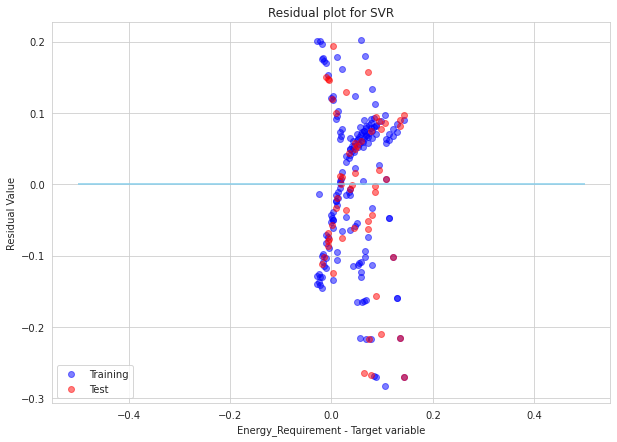

In [38]:
#  visualize the residual plot



#############################
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(sv_pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(sv_pred_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0,color='skyblue', xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for SVR')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")
#############################
        
###
# Solution
###



###
# END Solution
###

## 9. Comparison and results

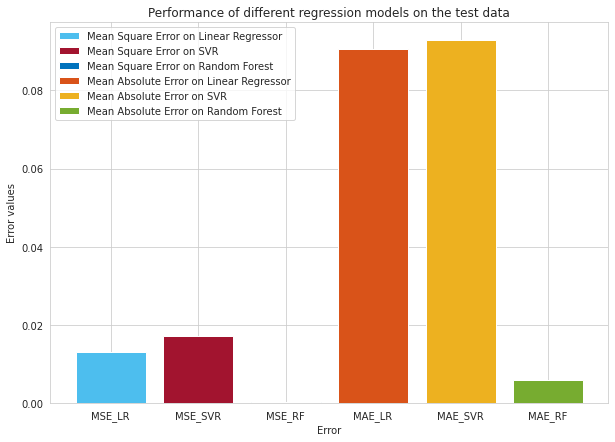

In [39]:
# visualisation of the results
%matplotlib inline 
plt.figure(figsize=(10,7))
plt.bar(['MSE_LR'],[MSE_linear_Test_Data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['MSE_SVR'],[MSE_svr_Test_Data], color=['#A2142F'], label="Mean Square Error on SVR")
plt.bar(['MSE_RF'],[MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")

plt.bar(['MAE_LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[MAE_svr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Error')
plt.ylabel('Error values')
plt.title('Performance of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()

><font color='black'>**Question:** Explain the results you obtained and choose the best model. </font>
<br>

>**Your Answer:** <span style="color:green">TBD </span>  MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
MAE is more robust to data with outliers.
The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable. in this case we use MSE as factor to compare our models. Among these three models RF has the least MSE and it is more efficent to use it for our dataset.

>**Feedback:** <span style="color:orange">... </span>

## 10. Deployment of the model

Now we want to predict the energy requirement for the following settings of production parameters with the best model.

 1. Setting 1: axis = 2, feed = 800 [mm/min], distance = 60 [mm]
 2. Setting 2: axis = 3, feed = 2000 [mm/min], distance = 40 [mm]
 3. Setting 3: axis = 1, feed = 1200 [mm/min], distance = -20 [mm]

><font color='black'>**Task:** Predict the energy requirement for the given production settings using your best model and the `predict()` method. </font>
<br> 

>**Feedback:** <span style="color:orange">... </span>

In [40]:
# Deployment of the best model for the production settings.

#############################
x = np.array([[2, 800, 60], [3, 2000, 40], [1, 1200, -20]])
pred_y1 = lreg.predict(x)
print(pred_y1)

pred_y2 = rf.predict(x)
print(pred_y2)

pred_y3 = sv.predict(x)
print(pred_y3)



#############################
        
###
# Solution
###



###
# END Solution
###

[ 0.14243648  0.12579628 -0.005816  ]
[0.05397684 0.28716186 0.02086519]
[0.07255354 0.06838345 0.00978724]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


><font color='black'>**Question:** What is the difference between parameters and hyperparameters of a model? Name an example for both.</font>
<br> 



>**Your Answer:** <span style="color:green">TBD </span> Basically, parameters are the ones that the “model” uses to make predictions etc. For example, the weight coefficients in a linear regression model. Hyperparameters are the ones that help with the learning process. For example, number of clusters in K-Means, shrinkage factor in Ridge Regression. They won’t appear in the final prediction piece, but they have a large influence on how the parameters would look like after the learning step.

>**Feedback:** <span style="color:orange">... </span>